# Training a Neural Network

In this homework, our objective is to implement a simple neural network from scratch, in particular, error backpropagation and the gradient descent optimization procedure. We first import some useful libraries.

In [34]:
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
na = numpy.newaxis
numpy.random.seed(0)

We consider a two-dimensional moon dataset on which to train the network. We also create a grid dataset which we will use to visualize the decision function in two dimensions. We denote our two inputs as $x_1$ and $x_2$ and use the suffix `d` and `g` to designate the actual dataset and the grid dataset.

In [36]:
# Create a moon dataset on which to train the neural network
import sklearn,sklearn.datasets
Xd,Td = sklearn.datasets.make_moons(n_samples=100)
Xd = Xd*2-1
Td = Td * 2 - 1
# Le *2 et -1 sont la pour s'assurer que nos donnees soient entre [-1,1]
X1d = Xd[:,0]
X2d = Xd[:,1]

# Creates a grid dataset on which to inspect the decision function
l = numpy.linspace(-4,4,100)
# numpy.linspace(a,b,c) : Permet de creer une liste de donnees points egalitairement espaces, commencant de a jusqu'a b, tout en repannt 100 interspaces ... 
# C'est evidemment eprfait pour faire des axes dans un repere.
X1g,X2g = numpy.meshgrid(l,l)
# Permet de creeer un quadrillage et donc un certain nomrbe de dimesions, en focntion de repere que l'on va lui donner, ici on lui donne deux axes entre -4 et 4 avec 100 intervalles egaux

**sklearn.datasets.make_moons(n_samples=100)** est une methode de generation de data par sklearn qui epremet de crer des datasets en deux dimensions quis ont 'challenging' pour certains algoritmes de classification, incluant les gaussian noises. C est asses utile pour entrainer ene decisino boundary un peu complexe. La data cree est une combinaison de deux cercles interleaving, comme dans le cours.

The moon dataset is plotted below along with some **dummy decision function $x_1+x_2=0$**.

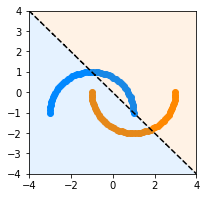

In [37]:
def plot(Yg,title=None): # delaration de la nouvelle figure et on lui attribue un nom
    plt.figure(figsize=(3,3))
    plt.scatter(*Xd[Td==-1].T,color='#0088FF') #plt.scatter = a scatter of y VS x (first two arguments) and a vareity of different options for the  scatter, size color and all ... 
    plt.scatter(*Xd[Td==1].T,color='#FF8800')
    plt.contour(X1g,X2g,Yg,levels=[0],colors='black',linestyles='dashed') #plt.contour = draws the contour and the lines of the scatter, can indicate the coordinates and the referenttial  in which tehy are planted.
    plt.contourf(X1g,X2g,Yg,levels=[-100,0,100],colors=['#0088FF','#FF8800'],alpha=0.1)
    if title is not None: plt.title(title)
    plt.show()
    
plot(X1g+X2g) # plot the dummy decision function

Ther plot function allow us to plot siome funcitons of the grid we made before.  The dummy function we plot test wether the somme of the two inputs X1 and X2 is larger or smaller than 0. In blue (plotted = curve) we see some points miss attributed. Same goes for the orange ones.

## Part 1: Implementing Error Backpropagation (30 P)

We would like to implement the neural network with the equations:
\begin{align*}
\forall_{j=1}^{25}:~ z_j &= x_1 w_{1j} + x_2 w_{2j} + b_j\\
\forall_{j=1}^{25}:~a_j &= \max(0,z_j)\\
y &= \sum_{j=1}^{25} a_j v_j
\end{align*}
where $x_1,x_2$ are the two input variables and $y$ is the output of the network. The parameters of the neural network are initialized randomly using the normal distributions $w_{ij} \sim \mathcal{N}(\mu=0,\sigma^2=1/2)$, $b_{j} \sim \mathcal{N}(\mu=0,\sigma^2=1)$, $v_{j} \sim \mathcal{N}(\mu=0,\sigma^2=1/25)$. The following code initializes the parameters of the network and implements the forward pass defined above. The neural network is composed of 50 neurons.

In [44]:
import numpy

NH = 50

W = numpy.random.normal(0,1/2.0**.5,[2,NH])
B = numpy.random.normal(0,1,[NH])
V = numpy.random.normal(0,1/NH**.5,[NH])

def forward(X1,X2):
    X = numpy.array([X1.flatten(),X2.flatten()]).T # Convert meshgrid into dataset
    Z = X.dot(W)+B
    A = numpy.maximum(0,Z)
    Y = A.dot(V)
    return Y.reshape(X1.shape) # Reshape output into meshgrid

We now consider the task of training the neural network to classify the data. For this, we define the error function:
$$
\mathcal{E}(\theta) = \frac1N\sum_{k=1}^N \max(0,-y^{(k)} t^{(k)})
$$
where $N$ is the number of data points, $y$ is the output of the network and $t$ is the label.

**Task:**

 * **Complete the function below so that it returns the gradient of the error w.r.t. the parameters of the model.**
 
 
 
**Notes persos** : 

Le but de cet exercice est de minimiser les erreurs pour que nous soyons le plus proches possibles de 0. Pour chauqe iterationm on va donc chercher a ce que le terme de droite dans la fonction max soit negatif ... donc la somme de Yk et Tk soit positive si jamais nous avons correctement predis la valeur. Il va fallior se souvenir de ces histoires de piopds negaitfs et positifs, comme pour le premier exercice, afin de pouvoir comprendre ce que signifie une prediction correcet et une prediction fausse. 

In [46]:
def backdrop(X1,X2,T):
    X = numpy.array([X1.flatten(),X2.flatten()]).T

    # Compute activations
    Z = X.dot(W)+B
    A = numpy.maximum(0,Z)
    Y = A.dot(V)

    # Compute backward pass
    DY = (-Y*T>0)*(-T)  #This is supposed to be the gradient of error in Y : Si la condition est remplie alors c'est egale à -T donc la déivé de l'erreur par rapport à Y
    DZ = numpy.outer(DY,V)*(Z>0) #DY times the weight of the second lqyer, la condition tenant pour que l erreur ne siot pas egale a zero, sinon zero ... a la rigeur pas tres utile 
    
    # Compute parameter gradients (averaged over the whole dataset)
    
    DV = A*DY[:,numpy.newaxis].mean(axis=0) # Combines the activation and the gradient of Y, and be carefull fo the dimensions (whcih is why we applied sliceing on DY)
    DB = DZ.mean(axis=0)
    DW = X.T.dot(DZ)/len(X)
    
    return DW,DB,DV

In [39]:
Y = - 0.5
X = 14

test = (- (Y)*X>0)
# Si la conditions ">0" n est pas respecte alors toutes l equations est egalea True, sinon Flase
test = (- (Y)*X>0)*(-X)
# Sinon elle est egale au memebre de gauche et non la multiplication des deux
print(test)

-14


Bien eplxique comment on  a retrouve le coup du rgadient :  La copndition entre parentyhese sert as avoir si on prend 0 ou bien la valeur quisuit a droite 
**numpy.outer** permet de faire le produit des A * B de tel sorte que la premiere ligne soit a0* tout les bs, puis al deuxie;e a1 * tout les B ... ETC
C'est tres utile puor faire un produit de vecteur quui nous donnerait une matrice comme normalement sans passer par numpy 
**numpyneaxis** permet d5'augmenter les dimensions de notre array par une, a chaque utilisation 

## Exercise 2: Training with Gradient Descent (20 P)

We would like to use error backpropagation to optimize the parameters of the neural network. The code below optimizes the network for $128$ iterations and at some chosen iterations plots the decision function along with the current error.

**Task:**
 * **Complete the procedure above to perform at each iteration a step along the gradient in the parameter space. A good choice of learning rate is $\eta=0.1$.**

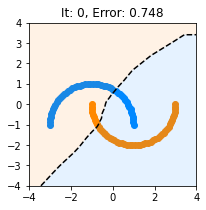

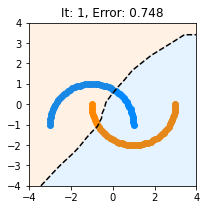

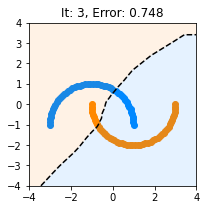

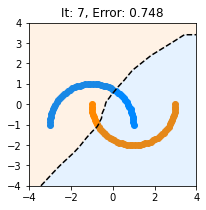

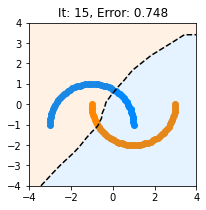

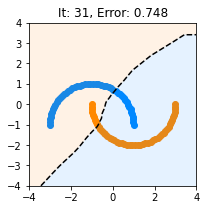

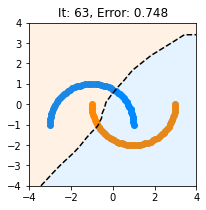

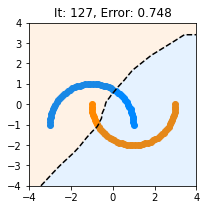

In [47]:
for i in range(128):
    
    if i in [0,1,3,7,15,31,63,127]:
        Yg = forward(X1g,X2g)
        Yd = forward(X1d,X2d)
        Ed = numpy.maximum(0,-Yd*Td).mean()
        plot(Yg,title="It: %d, Error: %.3f"%(i,Ed))

DW,DB,DV = backdrop(X1d,X2d,Td)
W = W -0.1*DW    # revoir la for;ule de training dams le cours .... mais en gros on cahnge W petit  apetit avec la valeur precedente :)
B = B - 0.1*DB
V = V - 0.1*DV